# WeRateDogs Data Analysis

# Introduction

In this notebook, we conduct an analysis on the WeRateDogs Twitter page by gathering three datasets from  different sources. We proceed by assessing, cleaning and storing the cleaned dataset for further analysis which we shall use in our report.

In [ ]:
# import necessary libraries

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import requests
import tweepy
import json
import os

import matplotlib.pyplot as plt


In [ ]:
# change directory
os.chdir('/content/drive/MyDrive/Colab Files/Udacity/Udacity - Data Analyst/projects/02_WeRateDogs')
!ls

01_wrangle_act.ipynb	 03_act_report.html   images
02_wrangle_report.html	 03_act_report.ipynb  tweet-json.txt
02_wrangle_report.ipynb  data		      twitter_archive_master.csv


# Data Gathering

## 1. WeRateDogs Twitter archive

As instructed, we read in our first dataset.

In [ ]:
weratedogs_arch = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
weratedogs_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


This gives us the dimension of our data.

In [ ]:
weratedogs_arch.shape

(2356, 17)

We view the number of unique values in each column.

In [ ]:
weratedogs_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [ ]:
tweet_ids = list(weratedogs_arch.tweet_id)
tweet_ids[0]

892420643555336193

We check the number of missing values for each column. We see that some columns have a high amount of missing value as a result, the entire column can be dropped.


In [ ]:
weratedogs_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## 2. Tweet image predictions data

We read in our second dataset.

In [ ]:
tweeet_image_pred = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
                               , sep='\t')

In [ ]:
tweeet_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
tweeet_image_pred.shape

(2075, 12)

In [ ]:
tweeet_image_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [ ]:
tweeet_image_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## 3. Additional data from the Twitter API

Since our third data (from Twitter) is a .txt file, we read it accordingly.

In [ ]:
with open('tweet-json.txt', encoding='utf8') as file:
    content = file.readline()
#     [:-1]
len(content)

3974

In [ ]:
content

'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"med

[Extract json objects from a list using python [duplicate] - StackOverflow](https://stackoverflow.com/questions/48593268/extract-json-objects-from-a-list-using-python)

In [ ]:
json.loads(content)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [ ]:
json.loads(content)['id'] # extracts the id of the tweet

892420643555336193

In [ ]:
json.loads(content)['favorite_count'] # extracts the favorite count of the tweet

39467

In [ ]:
json.loads(content)['retweet_count'] # extracts the retweet count of the tweet

8853

In [ ]:
json.loads(content)['id'] == tweet_ids[0] # a comparison to see if the file opened tallies with the we rate dogs archive

True

After experimenting with the first content of the tweet data, we now read the entire tweets from the tweet-json.txt file since we encountered some challenges with acquiring elevated access for Twitter developer account. Nonetheless, we attach the code for extracting data using Twitter API.

In [ ]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)


# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to


# df_1 = tweeet_image_pred.copy()
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet-json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [ ]:

df_list = [] # an empty list which we shall later convert to a dataframe


# reading the file contents
with open('tweet-json.txt', encoding='utf8') as f:
    contents = f.readlines()[:-1]
    
    print('The number of [actionable] items in the Twitter API is {}.'.format(len(contents)))
    
    for item in contents:
        tw_id = json.loads(item)['id']
        favorite_count = json.loads(item)['favorite_count']
        retweet_count = json.loads(item)['retweet_count']
        df_list.append({'tweet_id' : tw_id, 
                        'favorite_count' : favorite_count,
                        'retweet_count' : retweet_count
                       } )
        
tweet_api_data =  pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count' ])
print('\nData has been stored in a pandas dataframe.')

The number of [actionable] items in the Twitter API is 2353.

Data has been stored in a pandas dataframe.


In [ ]:
tweet_api_data.shape

(2353, 3)

In [ ]:
tweet_api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [ ]:
tweet_api_data.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

**Given the three above procedures, we have been able to extract data from the three sources.**

# Data Assessing

After gathering the datasets, we proceed with assessing them to identify quality and tidiness issues.





Before doing the programmatic assessment in the cells below, we have already visualized the dataframes via a text editor.

### 1. WeRateDogs Twitter archive

In [ ]:
weratedogs_arch.head() # first 5 rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [ ]:
weratedogs_arch.tail() # last 5 rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [ ]:
weratedogs_arch.sample() # a random sample of the data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518667751424/photo/1,12,10,None,None,None,pupper,None


After checking for duplicate, we see that our `weratedogs_arch` dataframe does not have any duplicate.

In [ ]:
weratedogs_arch.duplicated().sum()

0

We proceed to check for the missing values, we see that some columns should be appropriately dropped.

In [ ]:
weratedogs_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

From the below, we identify some wrong datatypes in the frame.

In [ ]:
weratedogs_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The below shows the number of unique values in each column, and we pay attention to those with counts lower than ten (10).

In [ ]:
weratedogs_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [ ]:
dogtionary = ['doggo','floofer','pupper','puppo']
def uniq_elements(list_, df):
    """
    This function prints the unique elements in a column of a data frame.

    list_ -> a list
    df -> dataframe containing the columns whose elements are in the list.
    """
    for i in list_:
        print('The unique element(s) in column {} is/are {}'.format(i, df[i].unique()))
uniq_elements(dogtionary, weratedogs_arch)

The unique element(s) in column doggo is/are ['None' 'doggo']
The unique element(s) in column floofer is/are ['None' 'floofer']
The unique element(s) in column pupper is/are ['None' 'pupper']
The unique element(s) in column puppo is/are ['None' 'puppo']


In [ ]:
dogtionary.append('name')

def uniq_ele_count(list_, df):
    """
    This function prints the unique elements and their counts in a column of a data frame.
    
    list_ -> a list
    df -> dataframe containing the columns whose elements are in the list.
    """
    for i in list_:
        print('The unique elements and their counts in column "{}" are: \n{} \n*****************'.format(i, df[i].value_counts()))
uniq_ele_count(dogtionary, weratedogs_arch)

The unique elements and their counts in column "doggo" are: 
None     2259
doggo      97
Name: doggo, dtype: int64 
*****************
The unique elements and their counts in column "floofer" are: 
None       2346
floofer      10
Name: floofer, dtype: int64 
*****************
The unique elements and their counts in column "pupper" are: 
None      2099
pupper     257
Name: pupper, dtype: int64 
*****************
The unique elements and their counts in column "puppo" are: 
None     2326
puppo      30
Name: puppo, dtype: int64 
*****************
The unique elements and their counts in column "name" are: 
None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64 
*****************


From the above, we see strange names like 'None' and 'a'. We also see a wrong dogtionary term 'None'. This problem is later addressed in the data cleaning stage.

In [ ]:
weratedogs_arch[weratedogs_arch.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


We can choose to read a text from the above.

In [ ]:
weratedogs_arch[weratedogs_arch.name == 'None'].loc[5, 'text']

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

The dataframe below outputs all instances where name is the string 'a'.

In [ ]:
weratedogs_arch[weratedogs_arch.name == 'a']
# .loc[56, 'text']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [ ]:
weratedogs_arch[weratedogs_arch.name == 'a'].loc[1737, 'text']

"Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC"

In [ ]:
weratedogs_arch[weratedogs_arch.rating_numerator < 6].head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,Non

In [ ]:
weratedogs_arch[weratedogs_arch.rating_numerator < 5].loc[2335, 'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [ ]:
weratedogs_arch[weratedogs_arch.rating_numerator < 10].loc[462, 'text']

"RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…"

Are there tweets with the numerator equal to zero?

In [ ]:
weratedogs_arch[weratedogs_arch.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


Investigating the above results made us realize that the row with index 1016 is does not include the image of a dog.

Building on the previous query, we investigate further possibilities of tweets that are not dog image ratings. The result below proved vital in this case.

In [ ]:
weratedogs_arch[~(weratedogs_arch.in_reply_to_status_id.isna()) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


From the above, we see that our dataset consists of 78 rows that do not serve the purpose of our analysis.

As done for the first datasets, we programmatically assess the two other datasets.

### Tweet image predictions data

In [ ]:
tweeet_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
tweeet_image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [ ]:
tweeet_image_pred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


In [ ]:
tweeet_image_pred.duplicated().sum()

0

In [ ]:
tweeet_image_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [ ]:
tweeet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
tweeet_image_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

We investigate the columns with unique values less than 500.

In [ ]:
cols = list(tweeet_image_pred)
cols_trunc = cols[ 2: : 3]
cols_trunc 

['img_num', 'p1_dog', 'p2_dog', 'p3_dog']

In [ ]:
cols_trunc = cols_trunc + ['p1', 'p2', 'p3'] 
uniq_ele_count(cols_trunc, tweeet_image_pred)

The unique elements and their counts in column "img_num" are: 
1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64 
*****************
The unique elements and their counts in column "p1_dog" are: 
True     1532
False     543
Name: p1_dog, dtype: int64 
*****************
The unique elements and their counts in column "p2_dog" are: 
True     1553
False     522
Name: p2_dog, dtype: int64 
*****************
The unique elements and their counts in column "p3_dog" are: 
True     1499
False     576
Name: p3_dog, dtype: int64 
*****************
The unique elements and their counts in column "p1" are: 
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64 
*****************
The unique elements and their counts in col

### 3. Additional data from the Twitter API

In [ ]:
tweet_api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [ ]:
tweet_api_data.tail()

,tweet_id,favorite_count,retweet_count
2348,666050758794694657,136,60
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [ ]:
tweet_api_data.sample()

,tweet_id,favorite_count,retweet_count
971,750071704093859840,8653,3802


In [ ]:
tweet_api_data.duplicated().sum()

0

In [ ]:
tweet_api_data.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [ ]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2353 non-null   int64
 1   favorite_count  2353 non-null   int64
 2   retweet_count   2353 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
tweet_api_data.nunique()

tweet_id          2353
favorite_count    2006
retweet_count     1724
dtype: int64

In [ ]:
tweet_api_data.duplicated().sum()

0

## Quality

In summary, we highlight the data quality issues below:

`weratedogs_arch` table

- `tweet_id` is int instead of string
- `timestamp` is object data type instead of datetime
- None in the columns: `doggoo`, `floofer`, `pupper` and `puppo` should be replaced with NaN
- some of the ratings are not original to  WeRateDogs i.e they do not contain images, and are just comments/replies or retweets.
- 2278 missing records in `in_reply_to_user_id` and `in_reply_to_status_id` columns
- 2175 missing records in `retweeted_status_timestamp`, `retweeted_status_user_id`, and `retweeted_status_id` columns
- 59 missing records in `expanded_urls` column
- There are ratings that exists for other animals aside dogs
- In the `name` column, we have the names "None" and "a"
- Some ratings are not properly extracted



`tweeet_image_pred` table

- `tweet_id` is int instead of string data type

`tweet_api_data` table
- `tweet_id` is int instead of string data type

## Tidiness

`weratedogs_arch` table
- `doggoo`, `floofer`, `pupper` and `puppo` columns should be made into one.
- the `tweeet_image_pred` and `tweet_api_data` tables should be joined with the `weratedogs_arch` table.

# Data Cleaning

We create copies of our 3 datasets.

In [ ]:
weratedogs_arch_clean = weratedogs_arch.copy()
tweeet_image_pred_clean = tweeet_image_pred.copy()
tweet_api_data_clean = tweet_api_data.copy()

## Clean Quality Issues

### Retweets/comments/replies in dataframe
`weratedogs_arch` table:

**Define**

Update the dataframe by dropping the rows that consists of comments/replies or retweets.

**code**

In [ ]:
# this helps us to take only the rows which are nulls in the 'retweeted_status_id' and 'in_reply_to_status_id' columns

weratedogs_arch_clean = weratedogs_arch_clean[pd.isnull(weratedogs_arch_clean.retweeted_status_id)]
weratedogs_arch_clean = weratedogs_arch_clean[pd.isnull(weratedogs_arch_clean.in_reply_to_status_id)]

**Test**

In [ ]:
weratedogs_arch_clean[~pd.isnull(weratedogs_arch_clean.retweeted_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [ ]:
weratedogs_arch_clean[~pd.isnull(weratedogs_arch_clean.in_reply_to_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Missing Data
`weratedogs_arch` table:

- 2278 missing records in `in_reply_to_user_id` and `in_reply_to_status_id` columns
- 2175 missing records in `retweeted_status_timestamp`, `retweeted_status_user_id`, and `retweeted_status_id` columns
- 59 missing records in `expanded_urls` column


**Define**

Drop the columns that are not of interest that also has a high amount of missing values

**Code**

In [ ]:
def drop_a_column(df, cols):
    """
    This functiion drops a column in a dataframe and returns the new df without
    the dropped column(s).

    cols is a list. Its element are columns in df.
    df is a pandas dataframe

    returns a dataframe with the dropped columns
    """

    df_dr = df.drop(cols, axis = 1)

    return df_dr

In [ ]:
weratedogs_arch_clean = drop_a_column(weratedogs_arch_clean, ['expanded_urls', 'retweeted_status_id',\
                                      'retweeted_status_user_id', 'retweeted_status_timestamp',\
                                      'in_reply_to_status_id', 'in_reply_to_user_id'])

Test

In [ ]:
weratedogs_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [ ]:
weratedogs_arch_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None


### `tweet_id` is of type int in all tables

**Define**

Convert the `tweet_id` to its proper datatype i.e string.

**Code**

In [ ]:
tweet_api_data_clean.tweet_id = tweet_api_data_clean.tweet_id.astype(str)
tweeet_image_pred_clean.tweet_id = tweeet_image_pred_clean.tweet_id.astype(str)
weratedogs_arch_clean.tweet_id = weratedogs_arch_clean.tweet_id.astype(str)

**Test**

In [ ]:
tweet_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2353 non-null   object
 1   favorite_count  2353 non-null   int64 
 2   retweet_count   2353 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [ ]:
tweeet_image_pred_clean.tweet_id.dtype

dtype('O')

In [ ]:
weratedogs_arch_clean.tweet_id.dtype

dtype('O')

### `timestamp` wrong datatype

**Define** : `weratedogs_arch`

Convert the column to the datetime datatype

**Code**

In [ ]:
weratedogs_arch_clean.timestamp = weratedogs_arch_clean.timestamp.astype('datetime64')

**Test**

In [ ]:
weratedogs_arch_clean.timestamp.dtype

dtype('<M8[ns]')

In [ ]:
weratedogs_arch_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2097 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.8 KB


### 'None' and 'a' appearing in `weratedogs_arch_clean`

**Define** 

Replace 'None' and 'a' with _np.nan_

**Code**

In [ ]:
weratedogs_arch_clean = weratedogs_arch_clean.replace('None', np.nan)
weratedogs_arch_clean = weratedogs_arch_clean.replace('a', np.nan)

**Test**

In [ ]:
uniq_ele_count(dogtionary, weratedogs_arch_clean)

The unique elements and their counts in column "doggo" are: 
doggo    83
Name: doggo, dtype: int64 
*****************
The unique elements and their counts in column "floofer" are: 
floofer    10
Name: floofer, dtype: int64 
*****************
The unique elements and their counts in column "pupper" are: 
pupper    230
Name: pupper, dtype: int64 
*****************
The unique elements and their counts in column "puppo" are: 
puppo    24
Name: puppo, dtype: int64 
*****************
The unique elements and their counts in column "name" are: 
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 953, dtype: int64 
*****************


From the above, we see that unlike previously, we do not have 'None' in our result.

In [ ]:
'None' in weratedogs_arch_clean.values or 'none' in weratedogs_arch_clean.values

False

In [ ]:
'None' in weratedogs_arch.values

True

In [ ]:
'a' in weratedogs_arch_clean.values

False

Furthermore, when we made a comparision with our original dataset, we see that 'None' and 'a' are no longer existing in our cleaned data.

## Ratings Problem

## Define:
Use regular expression to extract the ratings

**Code**

In [ ]:
weratedogs_arch_clean[weratedogs_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In the above, we have four instances where the data was not extracted correctly.

In [ ]:
weratedogs_arch_clean.rating_numerator.loc[45] = 13.5
weratedogs_arch_clean.rating_numerator.loc[695] = 9.75
weratedogs_arch_clean.rating_numerator.loc[763] = 11.27
weratedogs_arch_clean.rating_numerator.loc[1712] = 11.26

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Test**

In [ ]:
weratedogs_arch_clean[weratedogs_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


From the above, we see that the correct ratings have been reflected.

## Clean Tidiness Issues

### `doggoo`, `floofer`, `pupper` and `puppo` columns should be made into one.

**Define**

Concatenate the four columns into one column, proceed by cleaning the the columns, then drop the original columns when done.

**Code**

In [ ]:
weratedogs_arch_clean['dogtionary'] = weratedogs_arch_clean['doggo'].astype(str) + '-' + weratedogs_arch_clean['floofer'].astype(str) + '-' + weratedogs_arch_clean['pupper'].astype(str) + '-' + weratedogs_arch_clean['puppo'].astype(str)
weratedogs_arch_clean['dogtionary'] = weratedogs_arch_clean['dogtionary'].str.replace('nan-', "").str.replace('-nan', "")
weratedogs_arch_clean['dogtionary'] = weratedogs_arch_clean['dogtionary'].replace('nan', np.nan)

We convert the new column into category datatype.

In [ ]:
weratedogs_arch_clean[['dogtionary']] = weratedogs_arch_clean[['dogtionary']].astype('category')

We now drop the previously used columns

In [ ]:
list(weratedogs_arch_clean.columns)[-5:-1]

['doggo', 'floofer', 'pupper', 'puppo']

In [ ]:
weratedogs_arch_clean = drop_a_column(weratedogs_arch_clean, list(weratedogs_arch_clean.columns)[-5:-1])

**Test**

In [ ]:
weratedogs_arch_clean['dogtionary'].unique()

[NaN, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo', 'doggo-floofer', 'doggo-pupper']
Categories (7, object): ['doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer',
                         'pupper', 'puppo']

In [ ]:
weratedogs_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   int64         
 6   name                1439 non-null   object        
 7   dogtionary          336 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 198.0+ KB


### Combine the three dataset

**Define**

Join the three dataset using pandas merge on `tweet_id`

**Code**

[pandas three-way joining multiple dataframes on columns](https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns)

In [ ]:
weratedogs_arch_clean2 = pd.merge( pd.merge(weratedogs_arch_clean, tweet_api_data_clean,\
                                            on = 'tweet_id', how = 'left'), tweeet_image_pred_clean,\
                                  on = 'tweet_id', how = 'left')

**Test**

In [ ]:
weratedogs_arch_clean2.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogtionary,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,NaN,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,NaN,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,NaN,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,NaN,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [ ]:
weratedogs_arch_clean2.shape

(2097, 21)

In [ ]:
weratedogs_arch_clean2.tweet_id.duplicated().sum()

0

In [ ]:
weratedogs_arch_clean2[weratedogs_arch_clean2.notna()].shape

(2097, 21)

# Data Storing

In [ ]:
weratedogs_arch_clean2.to_csv('twitter_archive_master.csv', index=False)

# Analysis & Visualization 

We are interested in the following four analysis which will help our insights.

1. What are the tweets (i.e text) with the top 10 retweet count.
2. The  top 10 tweets (i.e text) with the most favourite count.
1. The popular dog breed prediction in `p1` following a consensus of 'True' in `p1_dog`, `p2_dog`, and `p3_dog`. 
3. The day of the week with most engagements.
    - engagement implies summation of likes and retweets.

## Top ten tweets [retweet count]

In [ ]:
top_ten_rt = weratedogs_arch_clean2[~(weratedogs_arch_clean2.favorite_count.duplicated())].sort_values(by = 'retweet_count', ascending = False)[['text', 'retweet_count']][:10]
top_ten_rt 

,text,retweet_count
825,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,79515.0
419,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,56625.0
864,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,52360.0
325,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,48265.0
60,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,45849.0
350,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,42228.0
421,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",37911.0
672,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,33421.0
115,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",32883.0
1590,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,31989.0


Above we have the tweets with the top ten retweet counts.

In [ ]:
top_ten_rt.to_csv('data/top_ten_rt.csv', index=False) # saving the dataframe output

## Top ten likes [favourite count]

In [ ]:
top_ten_likes = weratedogs_arch_clean2[~(weratedogs_arch_clean2.retweet_count.duplicated())].sort_values(by = 'favorite_count', ascending = False)[['text', 'favorite_count']][:10]
top_ten_likes

,text,favorite_count
325,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,132810.0
825,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,131075.0
60,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,107956.0
419,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,107015.0
115,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",106827.0
350,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,95450.0
99,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,85011.0
421,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",75639.0
141,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,75193.0
864,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,75163.0


Above we have the tweets with the top ten favourite counts.

In [ ]:
top_ten_likes.to_csv('data/top_ten_likes.csv', index=False)

## The popular dog breed prediction in `p1`.

We now analyze the popular dog breed prediction in p1 following a consensus of 'True' in `p1_dog`, `p2_dog`, and `p3_dog`.


In [ ]:
p1_pred = weratedogs_arch_clean2[(weratedogs_arch_clean2.p1_dog == True) & (weratedogs_arch_clean2.p2_dog == True) &\
                       (weratedogs_arch_clean2.p3_dog == True)]
p1_pred.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogtionary,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,NaN,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,NaN,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,NaN,NaN,56848.0,16716.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,NaN,28226.0,4429.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True


In [ ]:
p1_pred_dog_breeds = p1_pred.p1.value_counts()[:30]
p1_pred_dog_breeds = pd.DataFrame(p1_pred_dog_breeds).reset_index()
p1_pred_dog_breeds = p1_pred_dog_breeds.rename(columns={'p1':'count', 'index':'dog_breed'})
p1_pred_dog_breeds

,dog_breed,count
0,golden_retriever,117
1,Pembroke,77
2,Labrador_retriever,74
3,Chihuahua,50
4,pug,39
5,Pomeranian,28
6,chow,26
7,toy_poodle,26
8,malamute,26
9,Samoyed,25


From the above, where the three predictions `p1_dog`, `p2_dog` and `p3_dog` returns True, we see  that the model output `p1` used on the dog image prediction dataset has that most of the dogs are predicted to be the **golden retriever** breed.

In [ ]:
p1_pred_dog_breeds.to_csv('data/p1_pred_dog_breeds.csv', index=False)

## Day of the week with most engagement

[Create a day-of-week column in a Pandas dataframe using Python](https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python)

In [ ]:
weratedogs_arch_clean2['day_of_week'] = weratedogs_arch_clean2.timestamp.dt.day_name() #create a day of the week column i.e sunday, monday etc

In [ ]:
weratedogs_arch_clean2['day_of_week'].unique() # test for the unique values in the column

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

From the below output, most of the tweets were made on Mondays and the least number of tweets were made on Saturdays and Sundays.

In [ ]:
tweetdays = weratedogs_arch_clean2['day_of_week'].value_counts()
tweetdays

Monday       352
Tuesday      312
Wednesday    310
Thursday     295
Friday       292
Sunday       268
Saturday     268
Name: day_of_week, dtype: int64

In [ ]:
tweetdays.to_csv('data/tweetdays.csv')

We now create an engagement column i.e likes + retweets.

In [ ]:
weratedogs_arch_clean2['engagement'] = weratedogs_arch_clean2['retweet_count'] + weratedogs_arch_clean2['favorite_count']
engagement = weratedogs_arch_clean2.groupby('day_of_week')['engagement'].sum()
engagement

day_of_week
Friday       3372890.0
Monday       4004031.0
Saturday     3242883.0
Sunday       3061824.0
Thursday     3250752.0
Tuesday      3685191.0
Wednesday    4171291.0
Name: engagement, dtype: float64

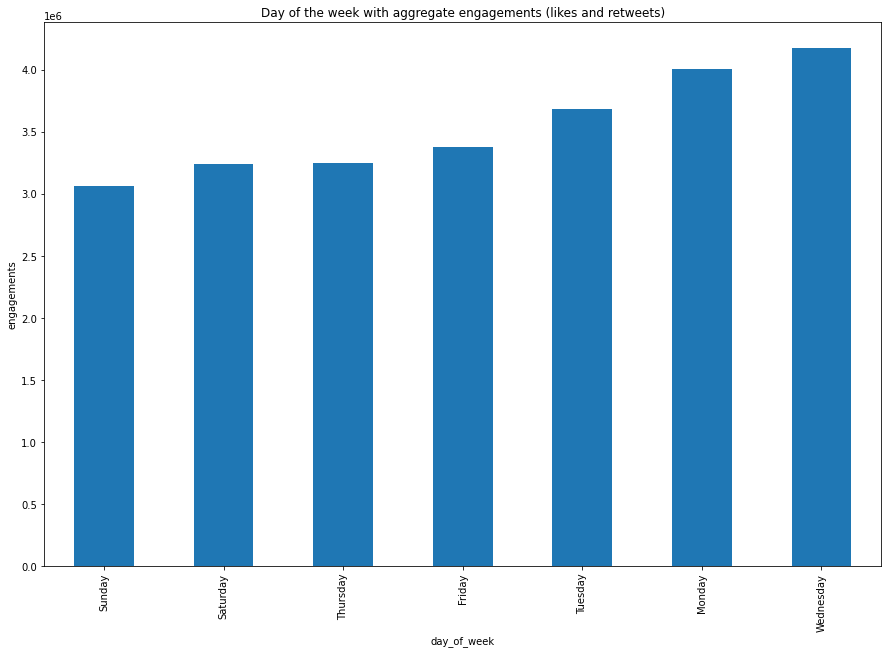

In [ ]:
plt.figure(figsize = (15, 10))
engagement.sort_values().plot(kind = 'bar')
plt.title("Day of the week with aggregate engagements (likes and retweets)")
plt.ylabel("engagements")
plt.savefig('images/engagements_per_day_of_week.png')

# References

1. [Extract json objects from a list using python [duplicate] - StackOverflow](https://stackoverflow.com/questions/48593268/extract-json-objects-from-a-list-using-python)
2. [pandas three-way joining multiple dataframes on columns](https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns)
3. [Create a day-of-week column in a Pandas dataframe using Python](https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python)